In [9]:
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')  
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.shape

(93686, 3)

DROP EMPTY CELLS

In [11]:
train_df = train_df.dropna()
test_df = test_df.dropna()
train_df.shape

(87074, 3)

DROP DUPLICATE CELLS

In [12]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()
train_df.shape

(82018, 3)

Text Cleaning

In [14]:

# Initialize stopwords and lemmatizer outside functions to avoid re-initialization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Text cleaning function
def clean_text(text):
    # Remove URLs, special characters, numbers, and extra spaces
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#|\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return re.sub(r'\s+', ' ', text).strip()

# Tokenization and normalization function
def tokenize_and_normalize(text):
    # Tokenize, lowercase, remove stopwords, and lemmatize
    tokens = word_tokenize(text.lower())
    return [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

# Apply the cleaning function and tokenization
train_df['cleaned_text'] = train_df['crimeaditionalinfo'].map(clean_text)
train_df['tokens'] = train_df['cleaned_text'].map(tokenize_and_normalize)

# Display the output
print(train_df[['crimeaditionalinfo', 'cleaned_text','tokens']].head())


                                  crimeaditionalinfo  \
0  I had continue received random calls and abusi...   
1  The above fraudster is continuously messaging ...   
2  He is acting like a police and demanding for m...   
3  In apna Job I have applied for job interview f...   
4  I received a call from lady stating that she w...   

                                        cleaned_text  \
0  I had continue received random calls and abusi...   
1  The above fraudster is continuously messaging ...   
2  He is acting like a police and demanding for m...   
3  In apna Job I have applied for job interview f...   
4  I received a call from lady stating that she w...   

                                              tokens  
0  [continue, received, random, call, abusive, me...  
1  [fraudster, continuously, messaging, asking, p...  
2  [acting, like, police, demanding, money, addin...  
3  [apna, job, applied, job, interview, telecalli...  
4  [received, call, lady, stating, send, new, pho..

In [15]:
train_df

,category,sub_category,crimeaditionalinfo,text_length,cleaned_text,tokens
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,258,I had continue received random calls and abusi...,"[continue, received, random, call, abusive, me..."
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,247,The above fraudster is continuously messaging ...,"[fraudster, continuously, messaging, asking, p..."
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,229,He is acting like a police and demanding for m...,"[acting, like, police, demanding, money, addin..."
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,538,In apna Job I have applied for job interview f...,"[apna, job, applied, job, interview, telecalli..."
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,194,I received a call from lady stating that she w...,"[received, call, lady, stating, send, new, pho..."
...,...,...,...,...,...,...
93681,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...,274,Identity theft Smishing SMS Fraud CreditDebit ...,"[identity, theft, smishing, sm, fraud, creditd..."
93682,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...,195,RECEIVED CALL FROM NUMBER ASKING ABOUT phone p...,"[received, call, number, asking, phone, pay, c..."
93683,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...,212,Cyber Stalking Blackmailing PhoneSMSVOIP Calls...,"[cyber, stalking, blackmailing, phonesmsvoip, ..."
93684,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...,231,Call karke bola ki aapka lotary laga ha aru AC...,"[call, karke, bola, ki, aapka, lotary, laga, h..."


In [16]:
print(train_df['tokens'][0])

['continue', 'received', 'random', 'call', 'abusive', 'message', 'whatsapp', 'someone', 'added', 'number', 'unknown', 'facebook', 'group', 'name', 'girl', 'still', 'getting', 'call', 'unknown', 'number', 'pls', 'help', 'sort', 'issue', 'soon', 'possible', 'thank']


        text_length
count  82018.000000
mean     387.789510
std      284.729094
min        1.000000
25%      204.000000
50%      289.000000
75%      485.000000
max     1517.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_17304\2538909126.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




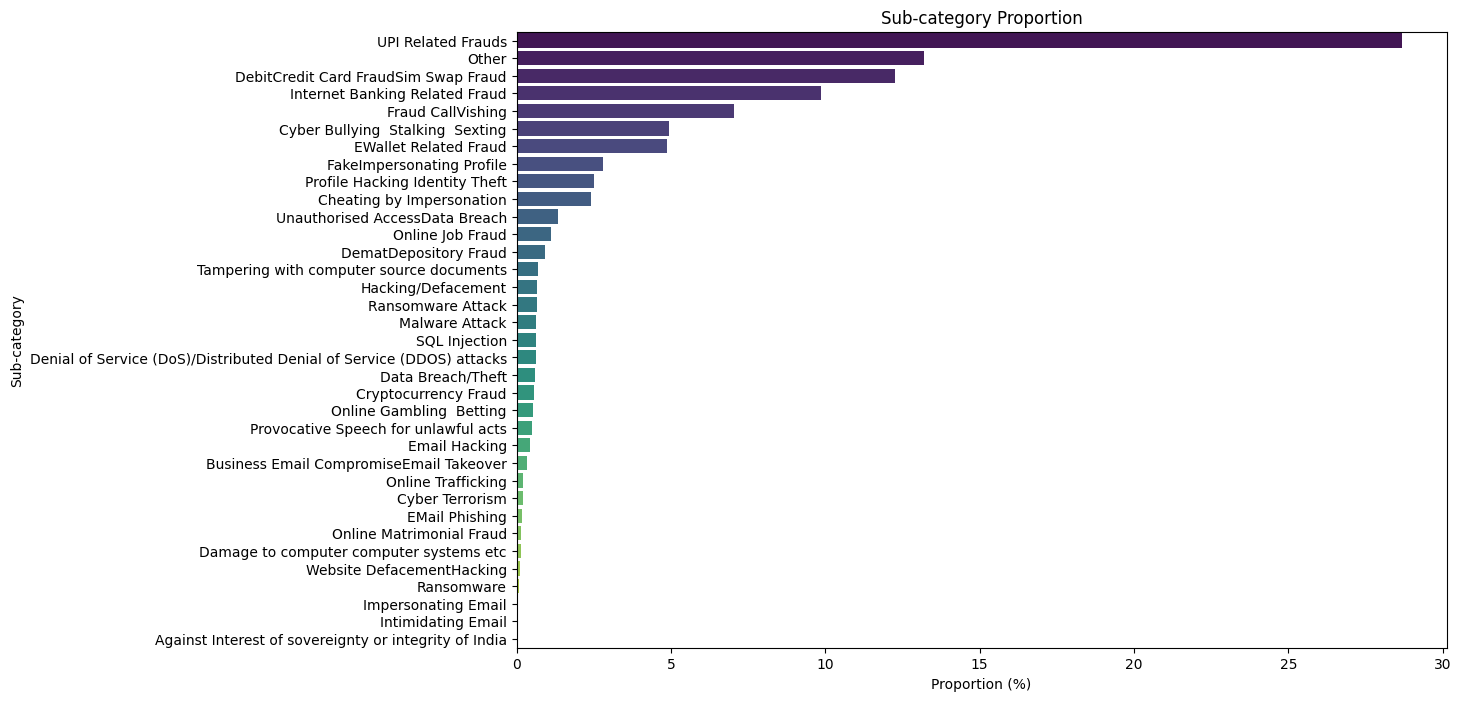

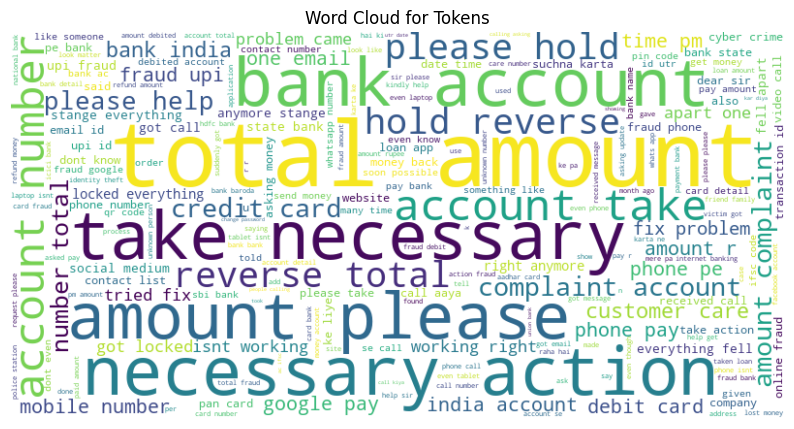

In [36]:
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

print(train_df.describe())

# Proportion of categories
category_proportion = train_df['category'].value_counts(normalize=True) * 100
fig = px.pie(values=category_proportion, names=category_proportion.index, title='Category Proportion')
fig.show()

# Bar chart for sub-category proportion
sub_category_proportion = train_df['sub_category'].value_counts(normalize=True) * 100
plt.figure(figsize=(12, 8))
sns.barplot(y=sub_category_proportion.index, x=sub_category_proportion.values, palette='viridis')
plt.title('Sub-category Proportion')
plt.xlabel('Proportion (%)')
plt.ylabel('Sub-category')
plt.show()

# Sankey diagram for category and sub-category
category_labels = train_df['category'].unique().tolist()
sub_category_labels = train_df['sub_category'].unique().tolist()
labels = category_labels + sub_category_labels

category_indices = {label: i for i, label in enumerate(category_labels)}
sub_category_indices = {label: i + len(category_labels) for i, label in enumerate(sub_category_labels)}

source = []
target = []
value = []

for category in category_labels:
    sub_categories = train_df[train_df['category'] == category]['sub_category'].value_counts(normalize=True) * 100
    for sub_category, proportion in sub_categories.items():
        source.append(category_indices[category])
        target.append(sub_category_indices[sub_category])
        value.append(proportion)

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color=px.colors.qualitative.Plotly, width=0.5),
        label=labels,
        color=px.colors.qualitative.Plotly
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] for i in source]
    )
))

fig.update_layout(title_text="Sankey Diagram of Category and Sub-category", font_size=12, title_font_size=20, title_x=0.5, height=600)
fig.show()
# Combine all tokens into a single list
all_tokens = [token for tokens in train_df['tokens'] for token in tokens]

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(' '.join(all_tokens))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tokens')
plt.show()

